In [2]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [3]:
first_year=1892
last_year=2024
years=np.linspace(first_year,last_year,last_year-first_year+1)

In [4]:
df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')
df.head()

,DAY,PRECIP_QUANTITY
0,1892-01-01,1.94
1,1892-01-02,0.49
2,1892-01-03,0.00
3,1892-01-04,0.00
4,1892-01-05,0.87


In [5]:
#I want to sum the precipitations for each month
df['DAY'] = pd.to_datetime(df['DAY'])

In [6]:
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month


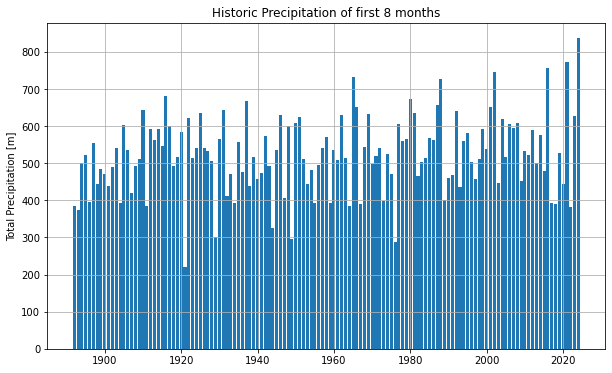

In [7]:
tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(years, tp_first_8_months['PRECIP_QUANTITY'], label='Total Precipitation')
plt.ylabel('Total Precipitation [m]')
plt.title('Historic Precipitation of first 8 months')
plt.grid()
#z = np.polyfit(years, historic_precipitation, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()


In [8]:
rainy_days = df[df['PRECIP_QUANTITY']!=0]

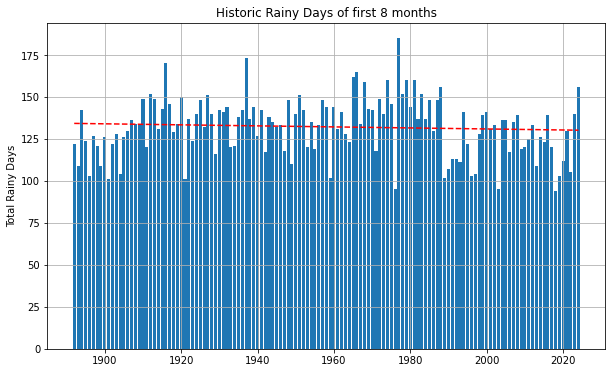

In [9]:
rainy_days_8_months = rainy_days[rainy_days['month']<9].groupby('year')['PRECIP_QUANTITY'].count().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(years, rainy_days_8_months['PRECIP_QUANTITY'], label='Total Precipitation')
plt.ylabel('Total Rainy Days')
plt.title('Historic Rainy Days of first 8 months')
plt.grid()
z = np.polyfit(years, rainy_days_8_months['PRECIP_QUANTITY'], 1)
p = np.poly1d(z)
plt.plot(years, p(years), "r--", label='Trendline')

plt.show()

In [10]:
#WD50

In [11]:
threshold=tp_first_8_months['PRECIP_QUANTITY']*0.5

In [12]:
rainy_days_ranked=rainy_days.sort_values(by=['year','PRECIP_QUANTITY'],ascending=[True,False])

In [13]:
#how many days are needed per year to get to the treshold?
wd50=[]
for year in years:
    cumsum=0
    for index, row in rainy_days_ranked[rainy_days_ranked['year']==year].iterrows():
        cumsum+=row['PRECIP_QUANTITY']
        if cumsum>threshold[year-first_year]:
            wd50.append(index)
            print(treshold[year-first_year])
            break

In [14]:
# Initialize the list to store the number of days needed per year to reach the threshold
wd50 = []

# Iterate over each year
for this_year in years:
    this_year = int(this_year)
    i=f'{this_year}'
    cumsum = 0
    days_count = 0  # Initialize the day counter
    # Filter the DataFrame for the current year and iterate over the rows
    for index, row in rainy_days_ranked[rainy_days_ranked['year'] == i].iterrows():
        cumsum += row['PRECIP_QUANTITY']
        days_count += 1  # Increment the day counter
        # Check if the cumulative sum exceeds the threshold
        if cumsum > threshold[int(this_year) - first_year]:
            wd50.append(days_count)  # Append the number of days needed
            break

    
    # Debugging print statements
    #print(f"Year: {this_year}, Cumulative Sum: {cumsum}, Days Needed: {days_count}, Threshold: {threshold[this_year - first_year]}")

# Print the result
print(wd50)

[12, 12, 14, 13, 9, 15, 15, 15, 14, 12, 16, 13, 11, 14, 17, 18, 18, 17, 23, 10, 16, 18, 17, 18, 19, 18, 15, 14, 18, 9, 15, 14, 12, 15, 13, 19, 17, 8, 15, 21, 10, 10, 13, 15, 18, 24, 14, 17, 11, 16, 15, 14, 12, 15, 19, 13, 21, 13, 19, 19, 13, 16, 15, 15, 14, 17, 19, 15, 13, 12, 16, 13, 8, 19, 18, 14, 23, 20, 18, 14, 19, 12, 12, 16, 7, 22, 18, 19, 19, 15, 13, 20, 11, 20, 12, 20, 24, 13, 13, 13, 16, 12, 15, 18, 9, 16, 13, 16, 19, 16, 18, 14, 11, 13, 16, 18, 15, 12, 9, 10, 16, 13, 16, 14, 21, 12, 9, 16, 10, 16, 10, 17, 21]


In [15]:

#la integral de esto tiene que ser igual a la probabilidad de tener mas de 500 osea 83/133
#la y axis tiene entonces que ser una densidad de probabilidad
#Fitten una GEV (Gamma) y encontrar el quantile en el cual du coup se encuentra el caso de mas de 800
rainy_days_ranked[rainy_days_ranked['year']=='2024'][0:20]

,DAY,PRECIP_QUANTITY,year,year_month,month
48402,2024-07-09,43.5,2024,2024-07,7
48424,2024-07-31,37.5,2024,2024-07,7
48437,2024-08-13,31.5,2024,2024-08,8
48426,2024-08-02,29.0,2024,2024-08,8
48248,2024-02-06,22.5,2024,2024-02,2
48213,2024-01-02,20.6,2024,2024-01,1
48349,2024-05-17,20.1,2024,2024-05,5
48405,2024-07-12,19.1,2024,2024-07,7
48464,2024-09-09,19.0,2024,2024-09,9
48381,2024-06-18,18.7,2024,2024-06,6


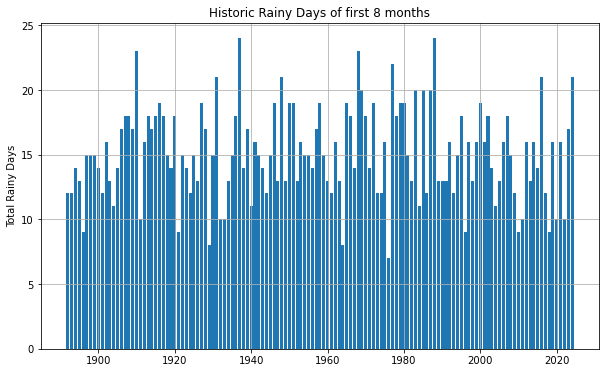

Moyenne de WD50 de 1892-1992: 15.37 et de 1992-2024: 14.454545454545455


In [18]:
plt.figure(figsize=(10, 6))
plt.bar(years, wd50, label='Total Precipitation')
plt.ylabel('Total Rainy Days')
plt.title('Historic Rainy Days of first 8 months')
plt.grid()
#z = np.polyfit(years, wd50, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()

print(f'Moyenne de WD50 de 1892-1992: {np.mean(wd50[0:100])} et de 1992-2024: {np.mean(wd50[100:])}')